In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
import os
import seaborn as sns
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly.offline import plot , iplot ,init_notebook_mode
init_notebook_mode(connected=True)
%matplotlib inline

warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
data = pd.read_excel(r'dataset\flow_data.xlsx')
data.head()

,timestamp,copy_mode,profile,total_runtime,status,records_processed,total_data_processed
0,20190819131549,LOCAL,SAP_UCSV,1290,FINISHED,30619937,2721723523
1,20190812065310,LOCAL,SAP_UCSV,1192,FINISHED,48666506,3902691720
2,20190902092042,LOCAL,SAP_UCSV,343,CANCELLED,32653243,2246436756
3,20190907063037,REMOTE,SAP_ALL,1800,FINISHED,60944409,5673935415
4,20190902064418,LOCAL,SAP_UCSV,249,CANCELLED,118175632,8857599641


In [3]:
data.shape

(362, 7)

In [4]:
# pd.set_option('display.precision',9)
settings_data = pd.read_excel(r'dataset\flow_settings.xlsx')
settings_data.head()

,timestamp,setting_name,setting_value
0,20191119080640,IGNORE_EXIT_ERRORS,X
1,20191119080640,IGNORE_TABLE_ERRORS,NaN
2,20191119080640,LOCK_SOURCE_CLIENT,NaN
3,20191119080640,PARALLEL_NUMBER,30
4,20191119080640,USE_EXCLUSIVE_LOCKS,X


In [5]:
flow_settings=pd.DataFrame(settings_data.pivot(index='timestamp', columns='setting_name', values='setting_value')).reset_index().rename_axis(None, axis=1)
flow_settings.sample(5)

,timestamp,IGNORE_EXIT_ERRORS,IGNORE_TABLE_ERRORS,LOCK_SOURCE_CLIENT,PARALLEL_NUMBER,USE_EXCLUSIVE_LOCKS,USE_TABLE_SEGMENTER
284,20190730075241,X,X,X,10,NaN,NaN
124,20190504101304,NaN,NaN,NaN,10,NaN,NaN
47,20190313091524,NaN,NaN,NaN,1,NaN,NaN
12,20190218152047,NaN,NaN,NaN,10,NaN,NaN
27,20190224063217,NaN,NaN,NaN,10,NaN,NaN


##### Lets join both tables

In [6]:
cc_data = data.join(flow_settings.set_index('timestamp'),on= 'timestamp',how='inner')
cc_data.head()

,timestamp,copy_mode,profile,total_runtime,status,records_processed,total_data_processed,IGNORE_EXIT_ERRORS,IGNORE_TABLE_ERRORS,LOCK_SOURCE_CLIENT,PARALLEL_NUMBER,USE_EXCLUSIVE_LOCKS,USE_TABLE_SEGMENTER
0,20190819131549,LOCAL,SAP_UCSV,1290,FINISHED,30619937,2721723523,X,NaN,NaN,6,NaN,NaN
1,20190812065310,LOCAL,SAP_UCSV,1192,FINISHED,48666506,3902691720,X,NaN,NaN,6,NaN,NaN
2,20190902092042,LOCAL,SAP_UCSV,343,CANCELLED,32653243,2246436756,NaN,NaN,X,7,X,NaN
3,20190907063037,REMOTE,SAP_ALL,1800,FINISHED,60944409,5673935415,X,X,X,10,NaN,NaN
4,20190902064418,LOCAL,SAP_UCSV,249,CANCELLED,118175632,8857599641,X,NaN,NaN,6,X,NaN


In [7]:
cc_data.columns = map(str.lower,cc_data.columns)
cc_data.head()

,timestamp,copy_mode,profile,total_runtime,status,records_processed,total_data_processed,ignore_exit_errors,ignore_table_errors,lock_source_client,parallel_number,use_exclusive_locks,use_table_segmenter
0,20190819131549,LOCAL,SAP_UCSV,1290,FINISHED,30619937,2721723523,X,NaN,NaN,6,NaN,NaN
1,20190812065310,LOCAL,SAP_UCSV,1192,FINISHED,48666506,3902691720,X,NaN,NaN,6,NaN,NaN
2,20190902092042,LOCAL,SAP_UCSV,343,CANCELLED,32653243,2246436756,NaN,NaN,X,7,X,NaN
3,20190907063037,REMOTE,SAP_ALL,1800,FINISHED,60944409,5673935415,X,X,X,10,NaN,NaN
4,20190902064418,LOCAL,SAP_UCSV,249,CANCELLED,118175632,8857599641,X,NaN,NaN,6,X,NaN


### Cleaning Data

In [8]:
# Lets see how many NaN values are present
cc_data.isna().sum()

timestamp                           0
copy_mode                           0
profile                             0
total_runtime                       0
status                              0
records_processed                   0
total_data_processed                0
ignore_exit_errors                162
ignore_table_errors               278
lock_source_client                212
parallel_number                     0
use_exclusive_locks               212
use_table_segmenter               335
dtype: int64

In [9]:
cc_data.fillna(0,inplace=True)
cc_data.isna().sum()

timestamp                         0
copy_mode                         0
profile                           0
total_runtime                     0
status                            0
records_processed                 0
total_data_processed              0
ignore_exit_errors                0
ignore_table_errors               0
lock_source_client                0
parallel_number                   0
use_exclusive_locks               0
use_table_segmenter               0
dtype: int64

In [10]:
# import pandas_profiling
# pandas_profiling.ProfileReport(cc_data)

# Rename Columns
cc_data.rename(columns={'total_runtime':'runtime_in_ms',
                        'total_data_processed' : 'size_in_bytes',
                       },
              inplace=True)


In [11]:
cc_data.head()

,timestamp,copy_mode,profile,runtime_in_ms,status,records_processed,size_in_bytes,ignore_exit_errors,ignore_table_errors,lock_source_client,parallel_number,use_exclusive_locks,use_table_segmenter
0,20190819131549,LOCAL,SAP_UCSV,1290,FINISHED,30619937,2721723523,X,0,0,6,0,0
1,20190812065310,LOCAL,SAP_UCSV,1192,FINISHED,48666506,3902691720,X,0,0,6,0,0
2,20190902092042,LOCAL,SAP_UCSV,343,CANCELLED,32653243,2246436756,0,0,X,7,X,0
3,20190907063037,REMOTE,SAP_ALL,1800,FINISHED,60944409,5673935415,X,X,X,10,0,0
4,20190902064418,LOCAL,SAP_UCSV,249,CANCELLED,118175632,8857599641,X,0,0,6,X,0


In [12]:
# Change to numeric columns
cc_data[['runtime_in_ms','records_processed','size_in_bytes']] = \
cc_data[['runtime_in_ms','records_processed','size_in_bytes']].apply(pd.to_numeric)


#### Lets check the distribution of runtime data for local client copy

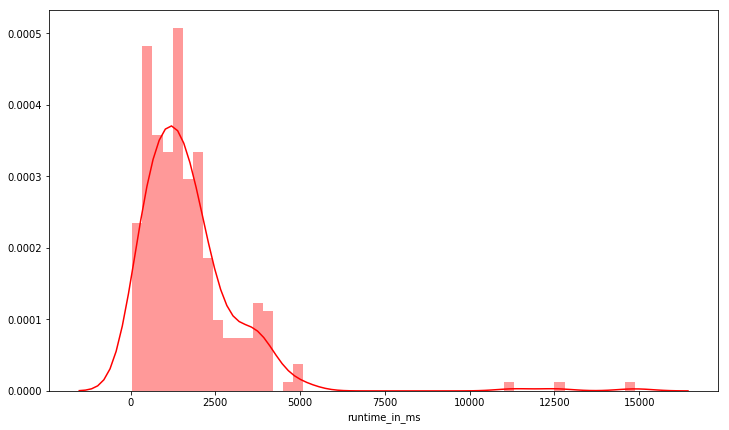

In [13]:
cc_data['copy_mode'] = cc_data['copy_mode'].str.strip()
criteria = cc_data.copy_mode=='LOCAL'
plt.figure(figsize=(12,7))
sns.distplot(cc_data.loc[criteria]['runtime_in_ms'],
             label = '1',
             color = 'red',
             bins=50
            )
plt.show()


Here we can see that there are a few outliers that have comparatively high runtimes

In [14]:
# Check the number of local client copy samples
cc_data.copy_mode.value_counts()

LOCAL     273
REMOTE     32
CMPLCL     22
DELETE     12
SIZE        9
IMPORT      7
EXPORT      6
Name: copy_mode, dtype: int64

In [15]:
cc_data.columns

Index(['timestamp', 'copy_mode', 'profile', 'runtime_in_ms', 'status',
       'records_processed', 'size_in_bytes', 'ignore_exit_errors            ',
       'ignore_table_errors           ', 'lock_source_client            ',
       'parallel_number               ', 'use_exclusive_locks           ',
       'use_table_segmenter           '],
      dtype='object')

In [16]:
cc_data.columns = cc_data.columns.str.replace(' ', '')
cc_data.columns

Index(['timestamp', 'copy_mode', 'profile', 'runtime_in_ms', 'status',
       'records_processed', 'size_in_bytes', 'ignore_exit_errors',
       'ignore_table_errors', 'lock_source_client', 'parallel_number',
       'use_exclusive_locks', 'use_table_segmenter'],
      dtype='object')

Remove all other modes of cc , because lets fight one battle a day !

In [17]:
cc_data['status'] = cc_data['status'].str.replace(" ","")
def remove_whitespace(x):
    try:
        # remove spaces inside and outside of string
        x = "".join(x.split())

    except:
        pass
    return x

# Apply remove_whitespace to column only
cc_data = cc_data.apply(remove_whitespace)
cc_data.status.value_counts()

FINISHED     281
CANCELLED     80
Name: status, dtype: int64

In [18]:
criteria = (cc_data.copy_mode=='LOCAL') & (cc_data.status == 'FINISHED')
local_cc_data = cc_data.loc[criteria]
# dont need timestamp, copy_mode
local_cc_data.drop(columns = ['timestamp','copy_mode'],inplace=True)
local_cc_data.head()

,profile,runtime_in_ms,status,records_processed,size_in_bytes,ignore_exit_errors,ignore_table_errors,lock_source_client,parallel_number,use_exclusive_locks,use_table_segmenter
0,SAP_UCSV,1290,FINISHED,30619937,2721723523,X,0,0,6,0,0
1,SAP_UCSV,1192,FINISHED,48666506,3902691720,X,0,0,6,0,0
5,SAP_UCSV,2875,FINISHED,152299974,13405474528,X,0,0,6,X,0
8,SAP_UCSV,1176,FINISHED,50315435,3035348648,X,0,0,6,0,0
9,SAP_ALL,1180,FINISHED,82981731,9182413424,X,0,0,6,0,0


### Standardization & Handling Categorical variables

In [19]:
# List the data types, so that we know what kind 
# of preprocessing is required
local_cc_data.dtypes

profile                object
runtime_in_ms           int64
status                 object
records_processed       int64
size_in_bytes           int64
ignore_exit_errors     object
ignore_table_errors    object
lock_source_client     object
parallel_number         int64
use_exclusive_locks    object
use_table_segmenter    object
dtype: object

Earlier we replaced the NaN values in the settings variable (binary variables) to O. Now, to be able to use the data with Machine Learning Algorithms we have to replace the X with 1.
so : 
- 1--> X
- 0--> (SPACE)     

In [20]:
local_w_dummies = pd.get_dummies(local_cc_data ,
                                 columns=[col for col in local_cc_data.columns.tolist() 
                                          if local_cc_data[col].dtype in ['object']
                                         ] 
)
local_w_dummies.head()

,runtime_in_ms,records_processed,size_in_bytes,parallel_number,profile_SAP_ALL,profile_SAP_APPX,profile_SAP_CUST,profile_SAP_UCSV,profile_SAP_UONL,profile_SAP_USER,...,ignore_exit_errors_0,ignore_exit_errors_X,ignore_table_errors_0,ignore_table_errors_X,lock_source_client_0,lock_source_client_X,use_exclusive_locks_0,use_exclusive_locks_X,use_table_segmenter_0,use_table_segmenter_X
0,1290,30619937,2721723523,6,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,1192,48666506,3902691720,6,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
5,2875,152299974,13405474528,6,0,0,0,1,0,0,...,0,1,1,0,1,0,0,1,1,0
8,1176,50315435,3035348648,6,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,1,0
9,1180,82981731,9182413424,6,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


Lets separate the features and the target variables

In [21]:
target = local_w_dummies.runtime_in_ms
features = local_w_dummies.drop(['runtime_in_ms'],axis=1)

In [22]:
# numeric_features = features.select_dtypes(include=['int64']).columns.tolist()
# features[numeric_features] = features[numeric_features].astype(float)
# features.sample(5)

Now lets scale all numeric features

In [23]:
numeric_features = features.select_dtypes(include=['int64']).columns.tolist()

scaler = StandardScaler()
scaler.fit(features[numeric_features])
features[numeric_features]=scaler.transform(features[numeric_features])

In [24]:
features.head()

,records_processed,size_in_bytes,parallel_number,profile_SAP_ALL,profile_SAP_APPX,profile_SAP_CUST,profile_SAP_UCSV,profile_SAP_UONL,profile_SAP_USER,profile_TABRANGE,...,ignore_exit_errors_0,ignore_exit_errors_X,ignore_table_errors_0,ignore_table_errors_X,lock_source_client_0,lock_source_client_X,use_exclusive_locks_0,use_exclusive_locks_X,use_table_segmenter_0,use_table_segmenter_X
0,-1,-1,-0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,-1,-0,-0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5,-0,0,-0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
8,-1,-1,-0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
9,-0,-0,-0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test = train_test_split(features ,target ,test_size = 0.3)

In [26]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgbModel = xgb.XGBClassifier()
xgbModel.fit(X_train ,y_train)
y_xgb_predictions = xgbModel.predict(X_test)
predictions = [round(value) for value in y_xgb_predictions]

accuracy = accuracy_score(y_test ,predictions)
print('Accuracy : {:2f} %'.format(accuracy*100))

Accuracy : 0.000000 %
